## PANDAS Series Creation and Indexing

In [30]:
# Create a Pandas Series 
import pandas as pd

step_data = [3620, 7891, 9761, 3907, 4338, 5373]
step_counts = pd.Series(step_data, name = 'steps')

print (step_counts)


0    3620
1    7891
2    9761
3    3907
4    4338
5    5373
Name: steps, dtype: int64


In [31]:
# Add a date range to Series 
step_counts.index = pd.date_range('20150329', periods = 6)
print (step_counts)

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: steps, dtype: int64


In [32]:
# Select data by index values, just like dictionary 
print (step_counts['2015-04-01'])

3907


In [33]:
# or by index position-like an array 
print (step_counts[3])

3907


In [34]:
# Select all of April 
print (step_counts['2015-04'])

2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: steps, dtype: int64


## PANDAS Data Types and Imputation 

In [35]:
# View the data type 
print (step_counts.dtypes)

int64


In [20]:
import numpy as np 

# Convert to a float 
step_counts = step_counts.astype(np.float)

# View the data type 
print (step_counts.dtypes)

float64


#### Invalid data points can be easily filled with values 

In [42]:
# Create invalid data 
step_counts[1:3] = np.NaN
print (step_counts)
print ("\n")


# Now fill it in with zeros 
step_counts = step_counts.fillna(0.)
print (step_counts[1:3])

# same as above 
# step_counts.fillna(0., inplace = True)
# print (step_counts)


2015-03-29    3620.0
2015-03-30       NaN
2015-03-31       NaN
2015-04-01    3907.0
2015-04-02    4338.0
2015-04-03    5373.0
Freq: D, Name: steps, dtype: float64


2015-03-30    0.0
2015-03-31    0.0
Freq: D, Name: steps, dtype: float64


## PANDAS DataFrame Creation and Methods 
#### DataFrames can be created from lists, dictionaries, and Pandas Series 

In [45]:
# Create cycling distance data 
cycling_data = [10.7, 0, None, 2.4, 15.3, 10.9, 0, None]

# Create a tuple of data 
joined_data = list(zip(step_data, cycling_data))

# Crate dataframe
activity_df = pd.DataFrame(joined_data)

print (activity_df)

      0     1
0  3620  10.7
1  7891   0.0
2  9761   NaN
3  3907   2.4
4  4338  15.3
5  5373  10.9


#### Label column and add an index 

In [46]:
# Add column names to dataframe 
activity_df = pd.DataFrame(joined_data, 
                           index = pd.date_range('20150329', periods = 6), 
                           columns = ['Walking','Cycling'])

print (activity_df)


            Walking  Cycling
2015-03-29     3620     10.7
2015-03-30     7891      0.0
2015-03-31     9761      NaN
2015-04-01     3907      2.4
2015-04-02     4338     15.3
2015-04-03     5373     10.9


### DataFrame Information 

In [193]:
# Number of rows using shape attribute 
print (data.shape[0])

# Column names using column attribute 
print (data.columns)
print (data.columns.tolist()) # tolist gets column names 

150
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'sepal_area', 'abbrev'],
      dtype='object')
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species', 'sepal_area', 'abbrev']


### Indexing dataframe ROWS using 'loc' and iloc' methods 

In [ ]:
# Select row of data by index name 'loc'
print (activity_df.loc['2015-04-01'])


In [50]:
# Select row of data by integer position 'iloc'
print (activity_df.iloc[-3])


Walking    3907.0
Cycling       2.4
Name: 2015-04-01 00:00:00, dtype: float64


### Indexing DataFrame COLUMNS 

In [51]:
# Name of column 
print (activity_df['Walking'])

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


#### DataFrame columns can also be indexed as properties 

In [52]:
# Object-oriented approach
print (activity_df.Walking)

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


In [53]:
# 1st column 
print (activity_df.iloc[:,0])

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


## Reading Data with PANDAS
#### Read CSV and common filetypes with a single command

In [64]:
# location of data file 
filepath = 'C:/Users/japor/Desktop/Machine Learning 501 Nervana/Intel-ML101_Class1/data/Iris_Data.csv'

# Import data 
data = pd.read_csv(filepath)

# Print a few rows 
print (data.iloc[:5])


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


### Assigning New Data to a DataFrame
#### Data can be (re)assigned to a dataframe column 

In [65]:
# Create a new column that is a product of both measurements 
data['sepal_area'] = data.sepal_length * data.sepal_width

# print a few rows and columns
print (data.iloc[:5,-3:]) # [-3:] index means -3 element to end 


   petal_width      species  sepal_area
0          0.2  Iris-setosa       17.85
1          0.2  Iris-setosa       14.70
2          0.2  Iris-setosa       15.04
3          0.2  Iris-setosa       14.26
4          0.2  Iris-setosa       18.00


### Applying a Function to a DataFrame Column 

In [69]:
# Lambda function applies what follows it to each row of data 
data['abbrev'] = (data.species.apply(lambda x: x.replace('Iris-','')))
#data['species'] = data.species.str.replace('Iris-','')

print (data.iloc[:5, -3:])

       species  sepal_area  abbrev
0  Iris-setosa       17.85  setosa
1  Iris-setosa       14.70  setosa
2  Iris-setosa       15.04  setosa
3  Iris-setosa       14.26  setosa
4  Iris-setosa       18.00  setosa


### Concatenating 2 DataFrames 

In [70]:
# Concatenate first 2 rows and last 2 rows 
small_data = pd.concat([data.iloc[:2], data.iloc[-2:]])

print (small_data.iloc[:,-3:])

            species  sepal_area     abbrev
0       Iris-setosa       17.85     setosa
1       Iris-setosa       14.70     setosa
148  Iris-virginica       21.08  virginica
149  Iris-virginica       17.70  virginica


## Aggregated Statistics with groupby

In [80]:
# Use size method with DataFrame to get count 
# For a Series, use the .value_counts method:
# data.species.value_counts() 
group_sizes = (data.groupby('species').size())

print (group_sizes)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Performing Statistical Calculations 

In [81]:
# MEAN of DataFrame 
print (data.mean())


sepal_length     5.843333
sepal_width      3.054000
petal_length     3.758667
petal_width      1.198667
sepal_area      17.806533
dtype: float64


In [82]:
# MEDIAN of Series 
print (data.petal_length.median())


4.35


In [83]:
# MODE of Series 
print (data.petal_length.mode())


0    1.5
dtype: float64


In [84]:
# STANDARD DEV, VARIANCE, SEM of Series 
print (data.petal_length.std(), 
       data.petal_length.var(), 
       data.petal_length.sem())


1.76442041995 3.11317941834 0.144064324021


In [105]:
# QUANTILES 
print (data.sepal_length.quantile(0))
print ("\n")
print (data.sepal_length.quantile([0.1,0.2]))


4.3


0.1    4.8
0.2    5.0
Name: sepal_length, dtype: float64


In [106]:
# Calculate multiple measurements using describe()

print (data.describe())

       sepal_length  sepal_width  petal_length  petal_width  sepal_area
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667   17.806533
std        0.828066     0.433594      1.764420     0.763161    3.368693
min        4.300000     2.000000      1.000000     0.100000   10.000000
25%        5.100000     2.800000      1.600000     0.300000   15.645000
50%        5.800000     3.000000      4.350000     1.300000   17.660000
75%        6.400000     3.300000      5.100000     1.800000   20.325000
max        7.900000     4.400000      6.900000     2.500000   30.020000


## Sampling from DataFrames 

In [109]:
# Sample 5 rows without replacement (subsequent draws are not independent)
sample = (data.sample(n=5, replace = False, random_state = 42))

print (sample.iloc[:,-3:])

             species  sepal_area      abbrev
73   Iris-versicolor       17.08  versicolor
18       Iris-setosa       21.66      setosa
118   Iris-virginica       20.02   virginica
78   Iris-versicolor       17.40  versicolor
76   Iris-versicolor       19.04  versicolor


## Basic Plots with Matplotlib

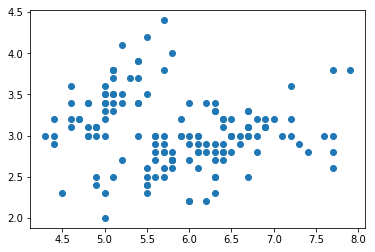

In [122]:
# Scatter plots using Pandas Series 

%matplotlib inline
import matplotlib.pyplot as plt 

plt.plot(data.sepal_length, data.sepal_width, ls='', marker ='o');

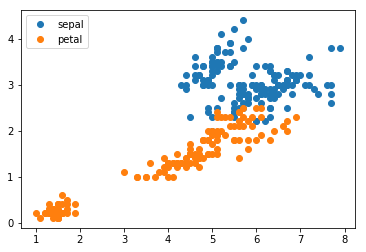

In [128]:
# Multiple layers of data 

plt.plot(data.sepal_length, data.sepal_width, ls='', marker='o', label='sepal');
plt.plot(data.petal_length, data.petal_width, ls='', marker='o', label='petal');
plt.legend(loc='best');

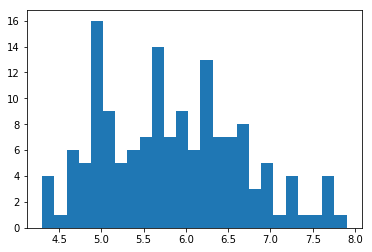

In [130]:
# Histograms 

plt.hist(data.sepal_length, bins=25);


## Customizing Matplotlib Plots 

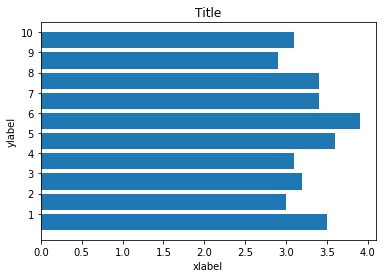

In [142]:
# Bar plot of first ten rows 
fig, ax = plt.subplots()

ax.barh(np.arange(10), data.sepal_width.iloc[:10]);

# Set position of ticks and tick labels 
ax.set_yticks(np.arange(0.4,10.4,1.0)); 
ax.set_yticklabels(np.arange(1,11));
ax.set(xlabel = 'xlabel', ylabel = 'ylabel', title = 'Title');


## Incorporating Statistical Calculations 

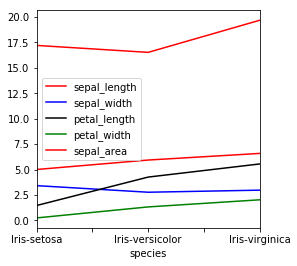

In [157]:
(data.groupby('species').mean()
 .plot(color = ['red','blue','black','green'], fontsize = 10.0, figsize=(4,4)));

## Statistical Plotting with Seaborn
#### Joint scatterplot and distribution

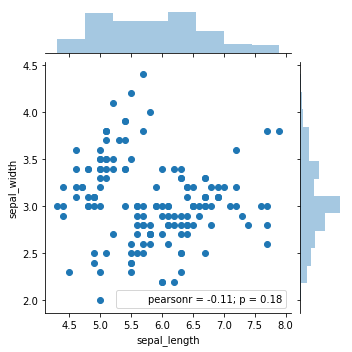

In [195]:
import seaborn as sns 

sns.jointplot(x = 'sepal_length', y = 'sepal_width', data = data, size = 5);

#### Correlation plots of all variable pairs 

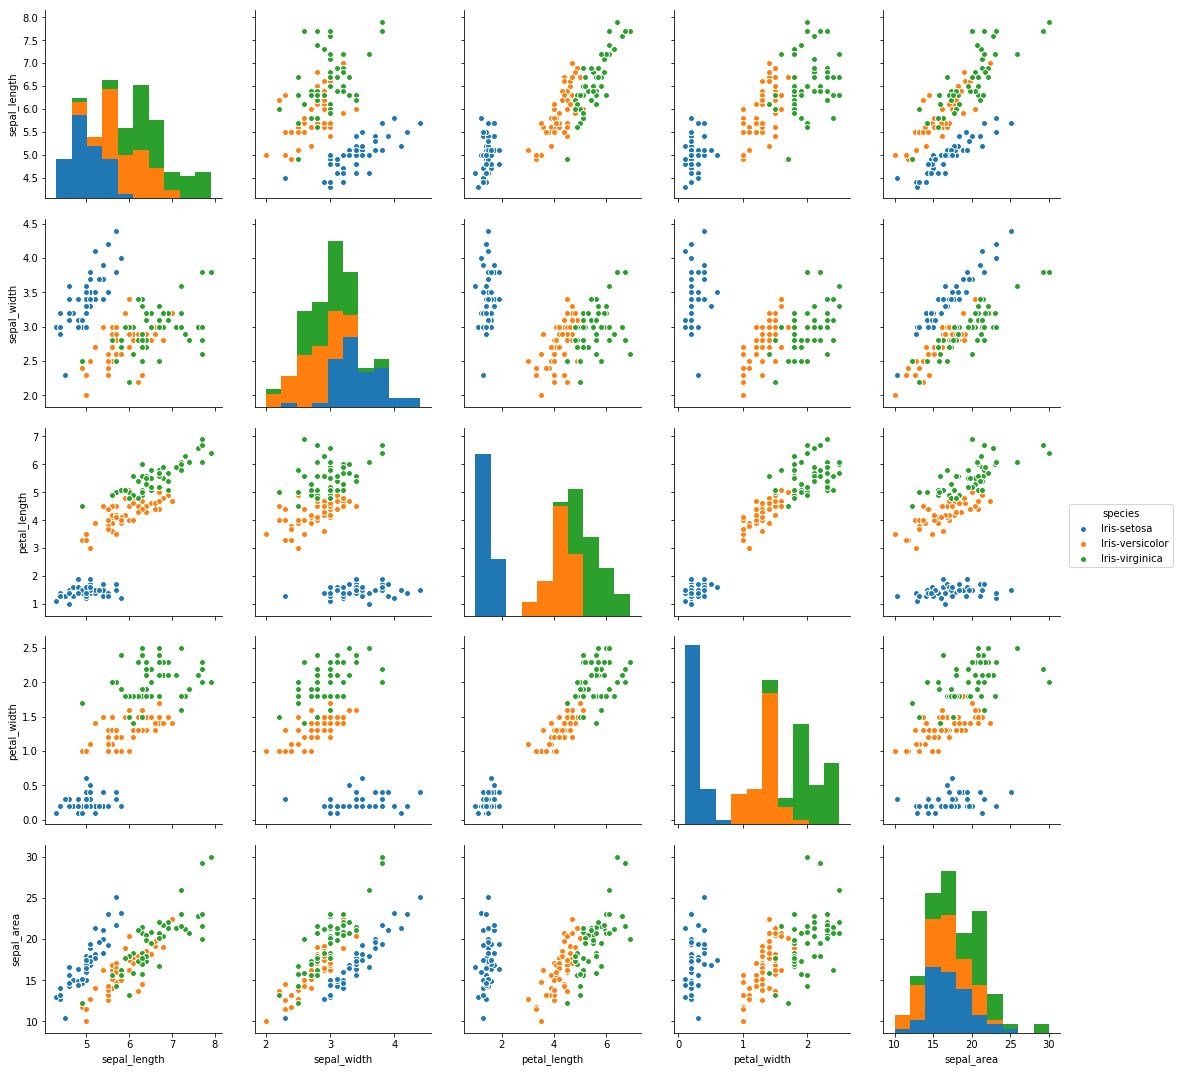

In [191]:
sns.pairplot(data, hue = 'species', size = 3);